In [1]:
from sklearn.datasets import fetch_kddcup99
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load 10% sample to avoid memory issues
data = fetch_kddcup99(subset='SA', percent10=True, shuffle=True)

X = pd.DataFrame(data.data)
y = pd.Series(data.target)

# Show shape and sample
print("Shape:", X.shape)
print("Sample:\n", X.head())


Shape: (100655, 41)
Sample:
       0       1         2       3    4     5  6  7  8  9   ...   31   32  \
0      0  b'tcp'   b'http'   b'SF'  345  1652  0  0  0  0  ...   13  255   
1      0  b'tcp'   b'http'  b'REJ'    0     0  0  0  0  0  ...    5  255   
2      0  b'tcp'   b'http'   b'SF'  289  3697  0  0  0  0  ...    7  255   
3  20940  b'udp'  b'other'   b'SF'  145   105  0  0  0  0  ...  255    3   
4      0  b'tcp'   b'http'   b'SF'  325  2881  0  0  0  0  ...   39  255   

     33    34    35    36   37   38   39    40  
0   1.0   0.0  0.08  0.01  0.0  0.0  0.0  0.07  
1   1.0   0.0   0.2  0.14  0.0  0.0  1.0  0.98  
2   1.0   0.0  0.14  0.02  0.0  0.0  0.0   0.0  
3  0.01  0.66  0.96   0.0  0.0  0.0  0.0   0.0  
4   1.0   0.0  0.03  0.02  0.0  0.0  0.0   0.0  

[5 rows x 41 columns]


In [3]:
# Convert all byte strings to regular strings
X = X.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Encode non-numeric columns to numeric using LabelEncoder
for col in X.columns:
    if X[col].dtype == object:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


C:\Users\VAISHANAVI\AppData\Local\Temp\ipykernel_10176\3412729161.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [4]:
# Convert labels: b'normal.' => 1 (normal), everything else => -1 (anomaly)
y_binary = y.apply(lambda val: 1 if val == b'normal.' else -1)


In [5]:
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X)

# Predict: 1 = normal, -1 = anomaly
y_pred = model.predict(X)


Confusion Matrix:
 [[ 1744  1633]
 [ 8322 88956]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.17      0.52      0.26      3377
           1       0.98      0.91      0.95     97278

    accuracy                           0.90    100655
   macro avg       0.58      0.72      0.60    100655
weighted avg       0.95      0.90      0.92    100655



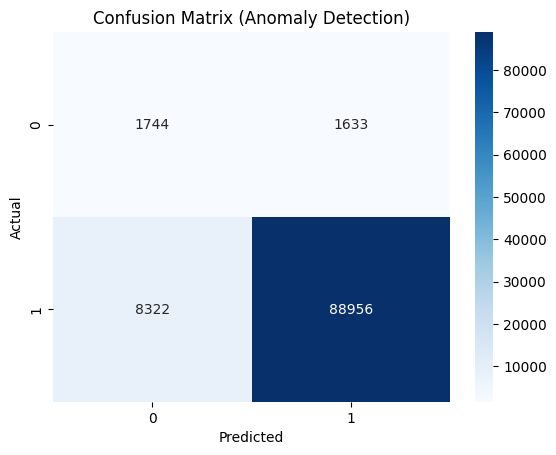

In [6]:
print("Confusion Matrix:\n", confusion_matrix(y_binary, y_pred))
print("\nClassification Report:\n", classification_report(y_binary, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_binary, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (Anomaly Detection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
